In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import plotly.express as px

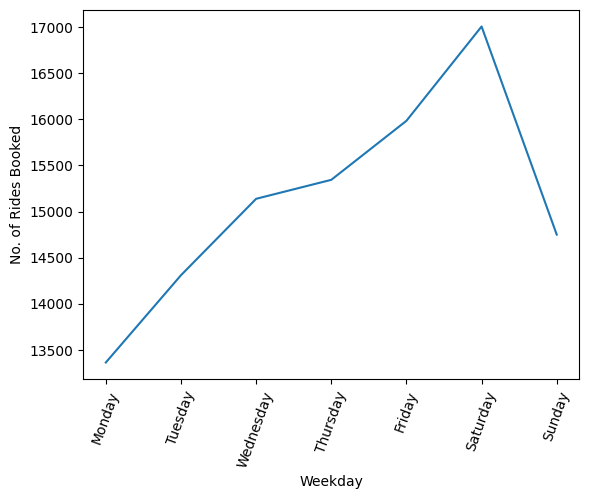

In [6]:
data = pd.read_csv("nyc_taxi.csv")

data

### We will convert the timestamp column to the DateTime format.

data['timestamp'] = pd.to_datetime(data['timestamp'])

##### There are many data points in our time series dataset. It may be hard to plot and visualize all the data points.We will resample the time-series dataset and aggregate it to hourly intervals. 

data = data.set_index('timestamp').resample("H").mean().reset_index()

data  ##Aggregate dataset

###### creating two new columns
# 1. Hour Column :  containing taxi rides of each hour of the day
# 2. weekday column : containing taxi rides of the each of week

###### creating two new columns
# 1. Hour Column :  containing taxi rides of each hour of the day
# 2. weekday column : containing taxi rides of the each of week

data['hour'] = data.timestamp.dt.hour

data['weekday']=pd.Categorical(data.timestamp.dt.strftime('%A'), categories=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)

data

#### we will plot two line chart
# 1. will show the number of taxi rides during each day of the week.
# 2. show the number of taxi rides during each hour of the day.

data[['value','weekday']].groupby('weekday').mean().plot(legend=None)
plt.xticks(rotation=70)
plt.ylabel('No. of Rides Booked')
plt.xlabel('Weekday')
plt.show()

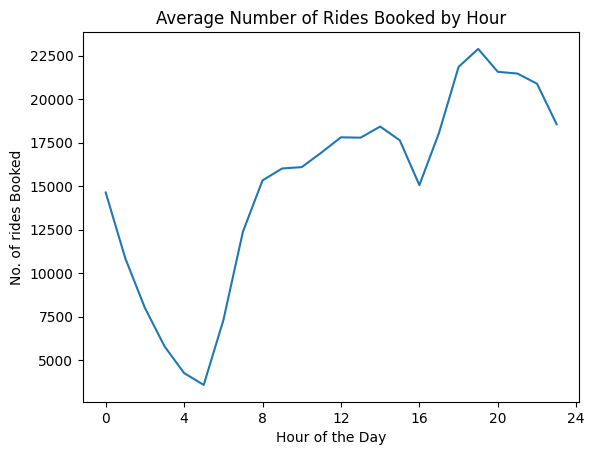

In [7]:
# ###### 
# The line chart above shows the number of taxi rides recorded during each day of the week. From this line chart, the number of taxi rides increases during the weekdays (Monday-Friday). It is because most people are going to work. During the weekends the number of rides reduces. Most people are at home and do not need taxi rides.

# ## second plot
tick_list = [0, 4, 8, 12, 16, 20, 24]
hourly_avg = data[['value', 'hour']].groupby('hour').mean()

hourly_avg.plot(legend=None)
plt.xticks(tick_list)

plt.ylabel('No. of rides Booked')
plt.xlabel('Hour of the Day')
plt.title('Average Number of Rides Booked by Hour')

plt.show()

In [8]:
# ###### 
#     The line chart above shows the number of taxi rides recorded during each hour of the day. During the morning hours (5-10), the number of taxi rides increases or is higher. Most people are going to work at this time. Also, during the evening hours, the number of rides is higher because most people travel home from work. 

# ### Detailed line plot
#     how all the data points in the aggregated time series dataset.

fig = px.line(data.reset_index(), x='timestamp', y='value', title='TAXI RIDES TAKEN PLACE')
fig.update_xaxes(
    rangeslider_visible=True,
)
fig.show()

## Building the anomaly detection using Isolation Forest 

from sklearn.ensemble import IsolationForest

model =  IsolationForest(contamination=0.004)

model.fit(data[['value']])

data['Anomalies']=pd.Series(model.predict(data[['value']])).apply(lambda x: 'yes' if (x == -1) else 'no' )


data.query('Anomalies == "yes"')

fig = px.scatter(data.reset_index(),x='timestamp', y='value',color='Anomalies',hover_data=['weekday']
                ,title='Taxi rides')

fig.update_xaxes(
rangeslider_visible = True,
)

fig.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



#
    diagram shows the anomalous data points/outliers (Red dots) and the normal data points (blue dots).

    We have detected, plotted, and visualized the anomalies in the time series dataset.